# Solve Poisson's equation

$$\nabla^2 \phi = f$$

for 

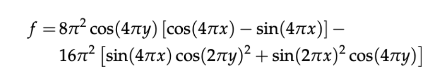

The analytical is:


$$\phi = \sin(2\pi x)^2\cos(4\pi y) + \sin(4\pi x)\cos(2\pi y)^2$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Check analytical solution:

In [9]:
# Create an XY grid

# Set number of points
Nx = 64
Ny = 64

# Min/Max values for the axes
x_min = 0.
x_max = 1.

y_min = 0.
y_max = 1.

# step sizes 
dx = (x_max - x_min)/Nx
dy = (y_max - y_min)/Ny

#print(dx)
#print(dy)

# Axes:
x = np.arange(x_min, x_max, dx)
y = np.arange(y_min, y_max, dy)

print(x.shape, y.shape)

# We create the 2D domain
X, Y = np.meshgrid(x, y)

print(X.shape, Y.shape)

(64,) (64,)
(64, 64) (64, 64)


Create function for:


$$\phi(x, y) = \sin(2\pi x)^2\cos(4\pi y) + \sin(4\pi x)\cos(2\pi y)^2$$

In [10]:
def exact_sln(xx, yy):
    
    phi_exact = (np.sin(2*np.pi*xx)**2)*(np.cos(4*np.pi*yy)) + \
    (np.sin(4*np.pi*xx))*(np.cos(2*np.pi*yy)**2)
    
    return phi_exact 

In [12]:
# Evaluate the function using our 2D grid

Z_sln = exact_sln(X, Y)

print(Z_sln.shape)


(64, 64)


### Plotting:

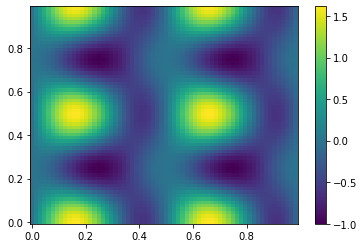

In [15]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, Z_sln)

plt.colorbar(A)

plt.show()

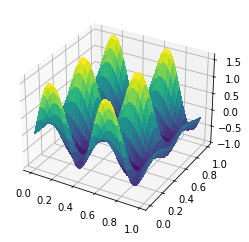

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_sln, cmap = 'viridis', linewidth=0, antialiased=False)

plt.show()

## FFT method to find the numerical sln:

In [24]:
# Get the spatial frequencies / wavenumbers

k_x = np.fft.fftfreq(x.size)/dx
k_y = np.fft.fftfreq(y.size)/dy

print(k_x.size, k_y.size)

64 64


In [28]:
# Create a grid in Fourier space

KX, KY = np.meshgrid(k_x, k_y)

print(KX.shape, KY.shape)

(64, 64) (64, 64)


### Function for f:

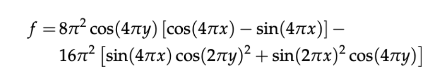

In [29]:
def rhs_function(xx, yy):
    
    rhs = 8*(np.pi**2)*np.cos(4*np.pi*yy)*(np.cos(4*np.pi*xx)\
    - np.sin(4*np.pi*xx)) - 16*(np.pi**2)*(np.sin(4*np.pi*xx)\
    *np.cos(2*np.pi*yy)**2 + (np.sin(2*np.pi*xx)**2)\
    *np.cos(4*np.pi*yy))
    
    return rhs

In [30]:
# Evaluate this in X, Y

f_xy = rhs_function(X, Y)


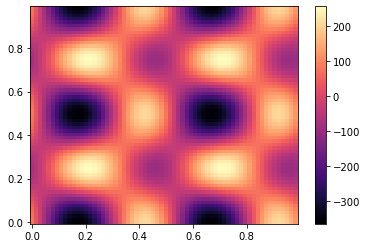

In [32]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, f_xy, cmap = 'magma')

plt.colorbar(A)

plt.show()

### FFT of the above image f_xy

In [34]:
# We use numpy functions to do the FFT:

F_kk = np.fft.fft2(f_xy)

print(F_kk)

[[ 5.89750471e-12+0.00000000e+00j  3.25754735e-12-8.11065446e-12j
   3.67058334e-11+1.61703599e+05j ... -8.74970273e-12-1.62903196e-11j
   3.67413606e-11-1.61703599e+05j  3.25754735e-12+8.11065446e-12j]
 [ 2.49241874e-11-8.08022389e-12j  3.25228557e-14-1.24561355e-13j
  -3.25135584e-11-1.18095368e-11j ...  8.46260378e-14-1.35793811e-13j
  -1.43540609e-11+2.73251963e-11j  3.34038231e-13+4.72427623e-13j]
 [-1.61703599e+05+5.39625035e-11j -1.75096924e-11+1.47376602e-12j
   1.61703599e+05+1.61703599e+05j ... -8.09977549e-13-1.01781267e-11j
   1.61703599e+05-1.61703599e+05j -1.73969774e-11-1.62005212e-12j]
 ...
 [-1.15228208e-11-4.13364032e-12j  3.08414396e-14-7.16158624e-14j
   9.55061125e-12+9.03377251e-12j ... -3.96094146e-13-5.15348753e-14j
   1.51710860e-11-5.60153026e-12j  1.38902123e-13-1.19357260e-13j]
 [-1.61703599e+05-5.03245247e-11j -1.73969774e-11+1.62005212e-12j
   1.61703599e+05+1.61703599e+05j ... -6.89439636e-13-9.92843620e-12j
   1.61703599e+05-1.61703599e+05j -1.75096924e-

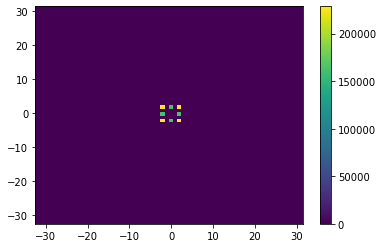

In [58]:
# Figure environment in Fourier space

KXX, KYY = np.meshgrid(sorted(k_x), sorted(k_y))


plt.figure(figsize=(6,4))

A = plt.pcolor(KXX, KYY, np.abs(np.fft.fftshift(F_kk)))

plt.colorbar(A)

plt.show()

## Get Phi_kk based on eq. 9.16

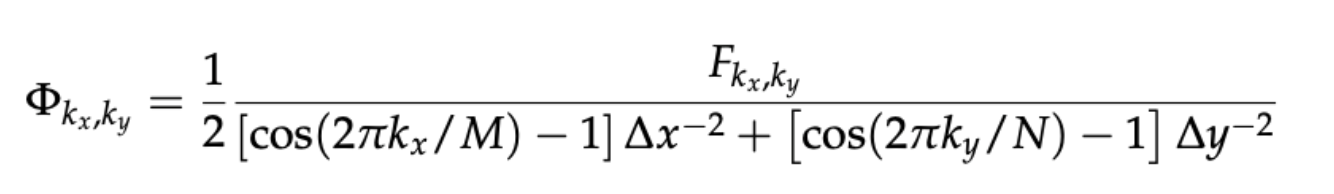

In [51]:
# Function to get Phi_kk in FOurier space

def phi_kk(K_XX, K_YY, F_kk):
    
    # Isolate the 0 frequency
    stamp_cont = F_kk[0,0]
    print(stamp_cont)
    
    # Calculate Phi_kk
    
    phi_kk_function = 0.5*F_kk/((np.cos(2*np.pi*K_XX/Nx) - 1)/dx**2\
    + (np.cos(2*np.pi*K_YY/Ny) - 1)/dy**2)
    
    # Put back the 0 frequency
    phi_kk_function[0, 0] = stamp_cont
    
    return phi_kk_function
    

In [53]:
# iFFT of phi_kk to get phi in real space 

f_sln = np.fft.ifft2(phi_kk(KX, KY, F_kk))

# Return solution in real space
numer_sln = np.real(f_sln)

print(numer_sln)

(5.8975047068088315e-12+0j)
[[ 1.07172359e-15  2.05356596e-01  4.22098025e-01 ... -4.72822153e-01
  -3.45732528e-01 -1.86080025e-01]
 [ 1.08094974e-15  2.03291063e-01  4.17675942e-01 ... -4.69091753e-01
  -3.42777787e-01 -1.84384886e-01]
 [ 1.09659233e-15  1.97173841e-01  4.04579631e-01 ... -4.58043908e-01
  -3.34027112e-01 -1.79364611e-01]
 ...
 [ 1.07612520e-15  1.87240011e-01  3.83312376e-01 ... -4.40103182e-01
  -3.19816787e-01 -1.71212128e-01]
 [ 1.06766613e-15  1.97173841e-01  4.04579631e-01 ... -4.58043908e-01
  -3.34027112e-01 -1.79364611e-01]
 [ 1.06615166e-15  2.03291063e-01  4.17675942e-01 ... -4.69091753e-01
  -3.42777787e-01 -1.84384886e-01]]


/var/folders/sw/g1jmwgb9161cw02pzv6xtvjw0000gn/T/ipykernel_83225/3051495215.py:11: RuntimeWarning: divide by zero encountered in true_divide
  phi_kk_function = 0.5*F_kk/((np.cos(2*np.pi*K_XX/Nx) - 1)/dx**2\
/var/folders/sw/g1jmwgb9161cw02pzv6xtvjw0000gn/T/ipykernel_83225/3051495215.py:11: RuntimeWarning: invalid value encountered in true_divide
  phi_kk_function = 0.5*F_kk/((np.cos(2*np.pi*K_XX/Nx) - 1)/dx**2\


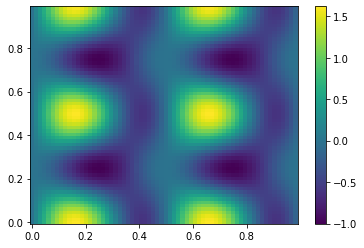

In [54]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, numer_sln)

plt.colorbar(A)

plt.show()